## Fake News Classifier Using LSTM

Dataset: https://www.kaggle.com/c/fake-news/data#

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
###Drop Nan Values
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)


In [5]:
## Get the Independent Features

df.columns = ["label","Tweet"]
df.head()

,label,Tweet
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
X = df.drop('label', axis=1)

In [7]:
## Get the Dependent features
y=df['label']

In [8]:
X.shape

(5572, 1)

In [9]:
y.shape

(5572,)

In [10]:
import tensorflow as tf

In [11]:
tf.__version__

'2.3.0'

In [12]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional,Dropout
from tensorflow.keras.layers import Dense

In [13]:
### Vocabulary size
voc_size=1000

### Onehot Representation

In [14]:
messages=X.copy()

In [15]:
messages['Tweet'][1]

'Ok lar... Joking wif u oni...'

In [16]:
messages.reset_index(inplace=True)

In [17]:
import nltk
import re
from nltk.corpus import stopwords

In [18]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubhabk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubhabk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
from nltk.stem import WordNetLemmatizer
import contractions

In [20]:
### Dataset Preprocessing
def process(news):
    lem = WordNetLemmatizer()
    sms = contractions.fix(news) 
    sms = sms.lower()
    sms = re.sub(r'https?://S+|www.S+', "", sms).strip() #removing url
    sms = re.sub("[^a-z ]", "", sms) # removing symbols and numbes
    sms = sms.split() 
    sms = [lem.lemmatize(word) for word in sms if not word in set(stopwords.words("english"))]
    sms = " ".join(sms)
    return sms

In [21]:
corpus = []
for i in range(0,len(X)):
    sms = process(X['Tweet'][i])
    corpus.append(sms)
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over',
 'dun say early hor c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back would like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month r entitled update latest colour mobile camera free call mobile update co free',
 'going home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost pday day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim tc wwwdbuknet lccltd pobox ldnwarw

In [25]:
corpus[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [26]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[0]

[987, 245, 81, 905, 777, 39, 694, 767, 478, 726, 329, 80, 824, 980, 361, 770]

### Embedding Representation

In [27]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[  0   0   0 ... 980 361 770]
 [  0   0   0 ... 435 888 179]
 [107 665 805 ...  63 874 518]
 ...
 [  0   0   0 ... 531 350 180]
 [  0   0   0 ... 298 550 107]
 [  0   0   0 ... 398 625 177]]


In [28]:
embedded_docs[0]

array([  0,   0,   0,   0, 987, 245,  81, 905, 777,  39, 694, 767, 478,
       726, 329,  80, 824, 980, 361, 770])

In [29]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            40000     
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 96,501
Trainable params: 96,501
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            40000     
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 153,001
Trainable params: 153,001
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
len(embedded_docs),y.shape

(5572, (5572,))

In [32]:
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder()
y = lb_enc.fit_transform(df["label"])

In [33]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [34]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [35]:
X_final.shape,y_final.shape

((5572, 20), (5572,))

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [37]:
### Finally Training
history = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
59/59 [==============================] - 5s 80ms/step - loss: 0.2874 - accuracy: 0.8920 - val_loss: 0.1244 - val_accuracy: 0.9663
Epoch 2/10
59/59 [==============================] - 3s 43ms/step - loss: 0.0802 - accuracy: 0.9783 - val_loss: 0.1059 - val_accuracy: 0.9706
Epoch 3/10
59/59 [==============================] - 2s 41ms/step - loss: 0.0407 - accuracy: 0.9885 - val_loss: 0.1206 - val_accuracy: 0.9679
Epoch 4/10
59/59 [==============================] - 2s 38ms/step - loss: 0.0261 - accuracy: 0.9936 - val_loss: 0.1461 - val_accuracy: 0.9668
Epoch 5/10
59/59 [==============================] - 2s 33ms/step - loss: 0.0148 - accuracy: 0.9962 - val_loss: 0.1580 - val_accuracy: 0.9690
Epoch 6/10
59/59 [==============================] - 2s 35ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.1718 - val_accuracy: 0.9641
Epoch 7/10
59/59 [==============================] - 2s 34ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.2004 - val_accuracy: 0.9630
Epoch 8/10
59

### Performance Metrics And Accuracy

In [38]:
y_pred= model1.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9679173463839043

In [46]:
 from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#target_names = ['label','Tweet']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1587
           1       0.91      0.85      0.88       252

    accuracy                           0.97      1839
   macro avg       0.94      0.92      0.93      1839
weighted avg       0.97      0.97      0.97      1839



In [48]:
history.history??

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

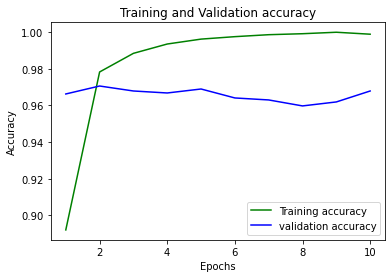

In [53]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epoch = range(1,11)
plt.plot(epoch, loss_train, 'g', label='Training accuracy')
plt.plot(epoch, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

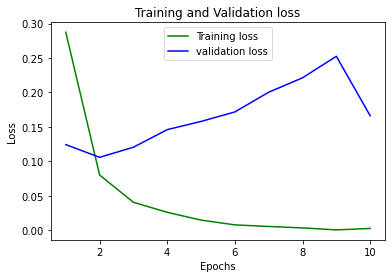

In [51]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
model1.save("model3.h5")

In [36]:
def predict_spam(text):
    result = process(text)
    onehot_repr=one_hot(result,voc_size)
    print(type(onehot_repr))
    list1 = []
    list1.append(onehot_repr)
    print(list1)
    sent_length=20
    embedded_docs=pad_sequences(list1,padding='pre',maxlen=sent_length)
    print(embedded_docs)
    prob = model1.predict(embedded_docs)
    print(prob)
    if prob > 0.95:
        return print("\n\nBiLSTM Prediction: Real News")
    else:
        return print("\n\nBiLSTM Prediction: Fake News")

In [37]:
text = str(input())
predict_spam(text)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
<class 'list'>
[[316, 739, 823, 778, 9, 77, 736, 168, 128, 496, 911, 22, 77, 486, 739, 378, 647, 461, 48, 79]]
[[316 739 823 778   9  77 736 168 128 496 911  22  77 486 739 378 647 461
   48  79]]
[[0.99973387]]


BiLSTM Prediction: Real News
